In [28]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st
from scipy.stats import linregress
import random
import os

,name,type,variable,value,year,crime_type
105,"New York, New York",place,rate,314.930281,2009,Aggravated assault
39,"New York, New York",place,rate,5.606537,2009,Murder and nonnegligent manslaughter
122,"New York, New York",place,rate,9.903693,2009,Forcible rape
129,"New York, New York",place,rate,12.428020,2010,Forcible rape
83,"New York, New York",place,rate,327.603088,2010,Aggravated assault
52,"New York, New York",place,rate,6.429941,2010,Murder and nonnegligent manslaughter
138,"New York, New York",place,rate,13.297816,2011,Forcible rape
145,"New York, New York",place,rate,363.242256,2011,Aggravated assault
6,"New York, New York",place,rate,6.271406,2011,Murder and nonnegligent manslaughter
148,"New York, New York",place,rate,5.054639,2012,Murder and nonnegligent manslaughter


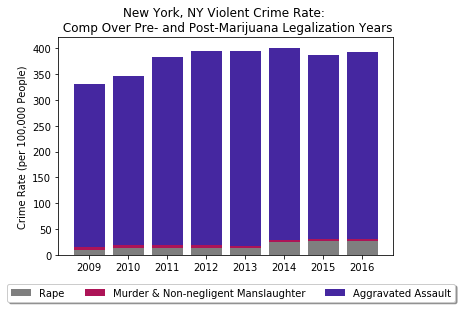

In [39]:
years = [2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018]

file_to_load1 = os.path.join("Output CSVs", "NYcrime.csv")

# load your city's CSV in a dataframe
NYcrimeDF = pd.read_csv(file_to_load1)

# filter whole NY dataset to just showing rates, not counts:
NYcrimeRates = NYcrimeDF.loc[NYcrimeDF["variable"] == "rate"]

# creating violent crime only set from there:
# restrict this violent crime set to a period of years useful for comparison w/ weed-legal cities:
NYcrimeRatesYears = NYcrimeRates.loc[NYcrimeRates["year"].isin(years)]
NYcrimeRatesYears = NYcrimeRatesYears.drop_duplicates()
# remove extraneous columns
NYcrimeRatesYears = NYcrimeRatesYears.drop(columns=["key", "id", "place_name"])
# sort the years to print in ascending order
NYcrimeRatesYears = NYcrimeRatesYears.sort_values(['year'], ascending=[True])

# create a list with the text of each violent-crime category and filter data again
Vcrime = ["Forcible rape", "Murder and nonnegligent manslaughter", "Aggravated assault", "Rape (revised definition)"]
NYcrimeRatesViolent = NYcrimeRatesYears.loc[NYcrimeRatesYears["crime_type"].isin(Vcrime)]

# Create seperate dataframes for each type of crime:

# create another category for the rape-specific crime types
rapeCategories = ["Forcible rape", "Rape (revised definition)"]
NYrape = NYcrimeRatesViolent.loc[NYcrimeRatesViolent["crime_type"].isin(rapeCategories)]
# set the index of each dataframe to the year the data was from
NYrape = NYrape.set_index(["year"])

NYmurder = NYcrimeRatesViolent.loc[NYcrimeRatesViolent["crime_type"] == "Murder and nonnegligent manslaughter"]
NYmurder = NYmurder.set_index(["year"])

NYassault = NYcrimeRatesViolent.loc[NYcrimeRatesViolent["crime_type"] == "Aggravated assault"]
NYassault = NYassault.set_index(["year"])

# Create a stacked bar plot where each crime type is in a distinct color:

# indices of each dataframe are the same size, can use arbitrary one for plot x-axis
NY_x_axis = NYrape.index
# each bar is a line here
p1 = plt.bar(NY_x_axis, NYrape["value"], color='black', alpha=0.5, align="center")
# the bottom arguments indicate where to start the second, third, etc bar in the set. From 2 on they become sums:
p2 = plt.bar(NY_x_axis, NYmurder["value"].values, color='#AD1457', bottom=NYrape["value"].values)
p3 = plt.bar(NY_x_axis, NYassault["value"].values, color='#4527A0', bottom=(NYmurder["value"] + NYrape["value"]).values)

tick_locations = [value for value in NY_x_axis]
plt.xticks(tick_locations, years)
plt.title("New York, NY Violent Crime Rate: \n Comp Over Pre- and Post-Marijuana Legalization Years")
plt.ylabel("Crime Rate (per 100,000 People)")
plt.legend((p1[0], p2[0], p3[0]), ("Rape", "Murder & Non-negligent Manslaughter", "Aggravated Assault"), bbox_to_anchor=(1.2, -0.11),
          fancybox=True, shadow=True, ncol=5)
NYcrimeRatesViolent

,name,type,variable,value,year,crime_type
3,"New York, New York",place,rate,1339.450609,2009,Larceny
119,"New York, New York",place,rate,1690.293679,2009,Property crime
16,"New York, New York",place,rate,223.547291,2009,Burglary
27,"New York, New York",place,rate,221.368955,2009,Robbery
150,"New York, New York",place,rate,127.295779,2009,Motor vehicle theft
93,"New York, New York",place,rate,1336.012155,2010,Larceny
40,"New York, New York",place,rate,235.220673,2010,Robbery
84,"New York, New York",place,rate,215.043135,2010,Burglary
108,"New York, New York",place,rate,1674.843648,2010,Property crime
68,"New York, New York",place,rate,123.788358,2010,Motor vehicle theft


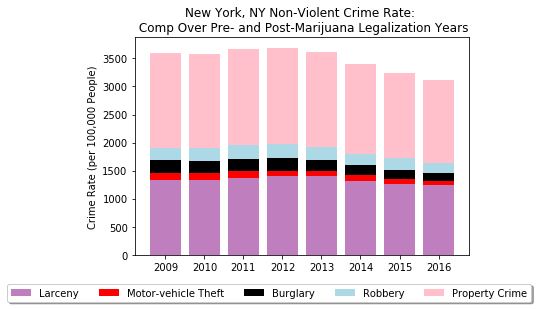

In [40]:
# Non-violent crime categorization for NY starts here:
# create non-violent crimes list
nonVcrime = ["Motor vehicle theft", "Larceny", "Burglary", "Robbery", "Property crime"]

# restricting new DataFrame to non-violent crimes in above list:
NYcrimeRatesNonViolent = NYcrimeRates.loc[NYcrimeRates["crime_type"].isin(nonVcrime)]
NYcrimeRatesNonViolent = NYcrimeRatesNonViolent.drop_duplicates()
NYcrimeRatesNonViolentYears = NYcrimeRatesNonViolent.loc[NYcrimeRatesNonViolent["year"].isin(years)]

# drop extraneous columns
NYcrimeRatesNVComparison = NYcrimeRatesNonViolentYears.drop(columns=["key", "id", "place_name"])
# sort year in ascending order
NYcrimeRatesNVComparison = NYcrimeRatesNVComparison.sort_values(['year'], ascending=[True])

# Create seperate dataframes for each type of crime:
NYlarceny = NYcrimeRatesNVComparison.loc[NYcrimeRatesNVComparison["crime_type"] == "Larceny"]
# set the index of each dataframe to the year
NYlarceny = NYlarceny.set_index(["year"])

NYmotor = NYcrimeRatesNVComparison.loc[NYcrimeRatesNVComparison["crime_type"] == "Motor vehicle theft"]
NYmotor = NYmotor.set_index(["year"])

NYburglary = NYcrimeRatesNVComparison.loc[NYcrimeRatesNVComparison["crime_type"] == "Burglary"]
NYburglary = NYburglary.set_index(["year"])

NYrobbery = NYcrimeRatesNVComparison.loc[NYcrimeRatesNVComparison["crime_type"] == "Robbery"]
NYrobbery = NYrobbery.set_index(["year"])

NYpropCrime = NYcrimeRatesNVComparison.loc[NYcrimeRatesNVComparison["crime_type"] == "Property crime"]
NYpropCrime = NYpropCrime.set_index(["year"])

# Create a stacked bar plot where each crime type is in a distinct color:

# indices of each dataframe are the same size, can use arbitrary one for plot x-axis
NY_x_axis = NYlarceny.index
# each bar is a line here
p1 = plt.bar(NY_x_axis, NYlarceny["value"], color='purple', alpha=0.5, align="center")
p2 = plt.bar(NY_x_axis, NYmotor["value"].values, color='red', bottom=NYlarceny["value"].values)
p3 = plt.bar(NY_x_axis, NYburglary["value"].values, color='black', bottom=(NYmotor["value"] + NYlarceny["value"]).values)
p4 = plt.bar(NY_x_axis, NYrobbery["value"].values, color="#ADD8E6", bottom = (NYmotor["value"] + NYlarceny["value"] + NYburglary["value"]).values)
p5 = plt.bar(NY_x_axis, NYpropCrime["value"].values, color='pink', bottom = (NYmotor["value"] + NYlarceny["value"] + NYburglary["value"] + NYrobbery["value"]).values)

tick_locations = [value for value in NY_x_axis]
plt.xticks(tick_locations, years)
plt.title("New York, NY Non-Violent Crime Rate: \n Comp Over Pre- and Post-Marijuana Legalization Years")
plt.ylabel("Crime Rate (per 100,000 People)")
plt.legend((p1[0], p2[0], p3[0], p4[0], p5[0]), ("Larceny", "Motor-vehicle Theft", "Burglary", "Robbery", "Property Crime"), bbox_to_anchor=(1.2, -0.11),
          fancybox=True, shadow=True, ncol=5)
NYcrimeRatesNVComparison

In [5]:
# created a series object with all-together sums of non-violent crime for NY, in case it's needed:
NYcrimeRatesNVComparison_gb = NYcrimeRatesNVComparison.groupby("year")
summedNV_NYcrime = NYcrimeRatesNVComparison_gb["value"].sum()
summedNV_NYcrime

year
2009    3601.956313
2010    3584.907969
2011    3661.611995
2012    3688.088966
2013    3610.141153
2014    3399.541040
2015    3235.533825
2016    3106.134914
Name: value, dtype: float64

,name,type,variable,value,year,crime_type
126,"Colorado Springs, Colorado",place,rate,490.008117,2009,Violent crime
54,"Colorado Springs, Colorado",place,rate,491.849424,2010,Violent crime
59,"Colorado Springs, Colorado",place,rate,440.190710,2011,Violent crime
164,"Colorado Springs, Colorado",place,rate,455.253107,2012,Violent crime
6,"Colorado Springs, Colorado",place,rate,434.066791,2013,Violent crime
62,"Colorado Springs, Colorado",place,rate,458.254766,2014,Violent crime
249,"Colorado Springs, Colorado",place,rate,438.319224,2015,Violent crime
213,"Colorado Springs, Colorado",place,rate,495.784432,2016,Violent crime


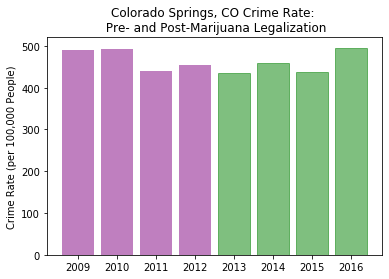

In [6]:
# basic violent crime CO dataset exploration
file_to_load2 = os.path.join("Output CSVs", "COcrime.csv")

COcrimeDF = pd.read_csv(file_to_load2)

COcrimeRates = COcrimeDF.loc[COcrimeDF["variable"] == "rate"]

COcrimeRatesViolent = COcrimeRates.loc[COcrimeRates["crime_type"] == "Violent crime"]
COcrimeRatesViolent = COcrimeRatesViolent.drop_duplicates()
COcrimeRatesViolentYears = COcrimeRatesViolent.loc[COcrimeRatesViolent["year"].isin(years)]

COcrimePostLegalization = COcrimeRatesViolent.loc[COcrimeRatesViolent["year"].isin(years)]
COcrimePostLegalization = COcrimePostLegalization.drop(columns=["key", "id", "place_name"])
COcrimePostLegalization = COcrimePostLegalization.sort_values(['year'], ascending=[True])
COcrimePostLegalization

CO_x_axis = np.arange(len(COcrimePostLegalization["value"]))
postLegalCO = plt.bar(CO_x_axis, COcrimePostLegalization["value"], color='purple', alpha=0.5, align="center")
postLegalCO[4].set_color('g')
postLegalCO[5].set_color('g')
postLegalCO[6].set_color('g')
postLegalCO[7].set_color('g')

tick_locations = [value for value in CO_x_axis]
plt.xticks(tick_locations, years)
plt.title("Colorado Springs, CO Crime Rate: \n Pre- and Post-Marijuana Legalization")
plt.ylabel("Crime Rate (per 100,000 People)")
COcrimePostLegalization

Weed legalized in CA and OR all of 2017 and 2018. Weed legalized in CO all of 2013 onwards.

Bar graphs clustered by city showing one bar per year in ascending order, bar height reflecting rate per 100,000ppl.


,name,type,variable,value,year,crime_type
44,"Colorado Springs, Colorado",place,rate,3.734818,2009,Murder and nonnegligent manslaughter
34,"Colorado Springs, Colorado",place,rate,269.902845,2009,Aggravated assault
7,"Colorado Springs, Colorado",place,rate,85.651825,2009,Forcible rape
263,"Colorado Springs, Colorado",place,rate,5.026565,2010,Murder and nonnegligent manslaughter
35,"Colorado Springs, Colorado",place,rate,80.173718,2010,Forcible rape
122,"Colorado Springs, Colorado",place,rate,274.450471,2010,Aggravated assault
119,"Colorado Springs, Colorado",place,rate,75.292674,2011,Forcible rape
113,"Colorado Springs, Colorado",place,rate,6.136707,2011,Murder and nonnegligent manslaughter
31,"Colorado Springs, Colorado",place,rate,252.785121,2011,Aggravated assault
110,"Colorado Springs, Colorado",place,rate,82.815352,2012,Forcible rape


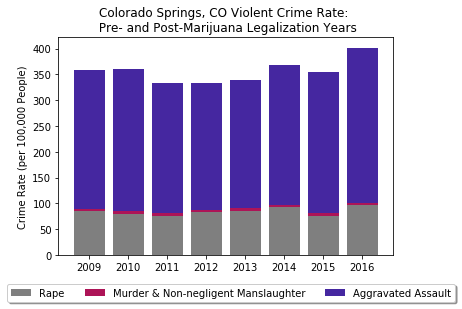

In [42]:
COcrimeRates
# creating violent crime only set from there:
# restrict this violent crime set to a period of years useful for comparison w/ weed-legal cities:
COcrimeRatesYears = COcrimeRates.loc[COcrimeRates["year"].isin(years)]
COcrimeRatesYears = COcrimeRatesYears.drop_duplicates()
# remove extraneous columns
COcrimeRatesYears = COcrimeRatesYears.drop(columns=["key", "id", "place_name"])
# sort the years to print in ascending order
COcrimeRatesYears = COcrimeRatesYears.sort_values(['year'], ascending=[True])

# create a list with the text of each violent-crime category and filter data again
Vcrime = ["Forcible rape", "Murder and nonnegligent manslaughter", "Aggravated assault", "Rape (revised definition)", 'Rape (legacy definition)']
COcrimeRatesViolent = COcrimeRatesYears.loc[COcrimeRatesYears["crime_type"].isin(Vcrime)]

# Create seperate dataframes for each type of crime:

# create another category for the rape-specific crime types
rapeCategories = ["Forcible rape", "Rape (revised definition)"]
COrape = COcrimeRatesViolent.loc[COcrimeRatesViolent["crime_type"].isin(rapeCategories)]
# set the index of each dataframe to the year the data was from
COrape = COrape.set_index(["year"])

COmurder = COcrimeRatesViolent.loc[COcrimeRatesViolent["crime_type"] == "Murder and nonnegligent manslaughter"]
COmurder = COmurder.set_index(["year"])

COassault = COcrimeRatesViolent.loc[COcrimeRatesViolent["crime_type"] == "Aggravated assault"]
COassault = COassault.set_index(["year"])

# Create a stacked bar plot where each crime type is in a distinct color:

# indices of each dataframe are the same size, can use arbitrary one for plot x-axis
CO_x_axis = COrape.index
# each bar is a line here
p1 = plt.bar(CO_x_axis, COrape["value"], color='black', alpha=0.5, align="center")
# the bottom arguments indicate where to start the second, third, etc bar in the set. From 2 on they become sums:
p2 = plt.bar(CO_x_axis, COmurder["value"].values, color='#AD1457', bottom=COrape["value"].values)
p3 = plt.bar(CO_x_axis, COassault["value"].values, color='#4527A0', bottom=(COmurder["value"] + COrape["value"]).values)

tick_locations = [value for value in CO_x_axis]
plt.xticks(tick_locations, years)
plt.title("Colorado Springs, CO Violent Crime Rate: \n Pre- and Post-Marijuana Legalization Years")
plt.ylabel("Crime Rate (per 100,000 People)")
plt.legend((p1[0], p2[0], p3[0]), ("Rape", "Murder & Non-negligent Manslaughter", "Aggravated Assault"), bbox_to_anchor=(1.2, -0.11),
          fancybox=True, shadow=True, ncol=5)
COcrimeRatesViolent

,name,type,variable,value,year,crime_type
21,"Colorado Springs, Colorado",place,rate,130.718629,2009,Robbery
176,"Colorado Springs, Colorado",place,rate,822.904892,2009,Burglary
147,"Colorado Springs, Colorado",place,rate,3665.848327,2009,Property crime
82,"Colorado Springs, Colorado",place,rate,264.176124,2009,Motor vehicle theft
92,"Colorado Springs, Colorado",place,rate,2578.767311,2009,Larceny
65,"Colorado Springs, Colorado",place,rate,323.710812,2010,Motor vehicle theft
50,"Colorado Springs, Colorado",place,rate,3029.510965,2010,Larceny
69,"Colorado Springs, Colorado",place,rate,4220.806965,2010,Property crime
75,"Colorado Springs, Colorado",place,rate,867.585188,2010,Burglary
104,"Colorado Springs, Colorado",place,rate,132.198670,2010,Robbery


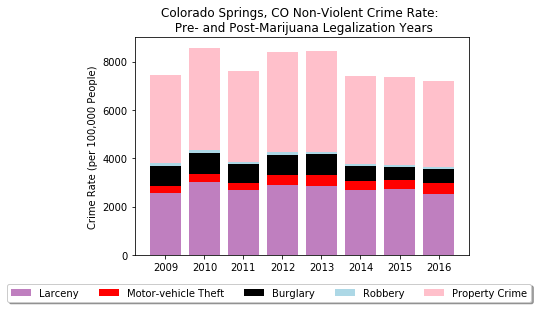

In [44]:
# Non-violent crime categorization for NY starts here:
# create non-violent crimes list
nonVcrime = ["Motor vehicle theft", "Larceny", "Burglary", "Robbery", "Property crime"]

# restricting new DataFrame to non-violent crimes in above list:
COcrimeRatesNonViolent = COcrimeRates.loc[COcrimeRates["crime_type"].isin(nonVcrime)]
COcrimeRatesNonViolent = COcrimeRatesNonViolent.drop_duplicates()
COcrimeRatesNonViolentYears = COcrimeRatesNonViolent.loc[COcrimeRatesNonViolent["year"].isin(years)]

# drop extraneous columns
COcrimeRatesNVComparison = COcrimeRatesNonViolentYears.drop(columns=["key", "id", "place_name"])
# sort year in ascending order
COcrimeRatesNVComparison = COcrimeRatesNVComparison.sort_values(['year'], ascending=[True])

# Create seperate dataframes for each type of crime:
COlarceny = COcrimeRatesNVComparison.loc[COcrimeRatesNVComparison["crime_type"] == "Larceny"]
# set the index of each dataframe to the year
COlarceny = COlarceny.set_index(["year"])

COmotor = COcrimeRatesNVComparison.loc[COcrimeRatesNVComparison["crime_type"] == "Motor vehicle theft"]
COmotor = COmotor.set_index(["year"])

COburglary = COcrimeRatesNVComparison.loc[COcrimeRatesNVComparison["crime_type"] == "Burglary"]
COburglary = COburglary.set_index(["year"])

COrobbery = COcrimeRatesNVComparison.loc[COcrimeRatesNVComparison["crime_type"] == "Robbery"]
COrobbery = COrobbery.set_index(["year"])

COpropCrime = COcrimeRatesNVComparison.loc[COcrimeRatesNVComparison["crime_type"] == "Property crime"]
COpropCrime = COpropCrime.set_index(["year"])

# Create a stacked bar plot where each crime type is in a distinct color:

# indices of each dataframe are the same size, can use arbitrary one for plot x-axis
CO_x_axis = COlarceny.index
# each bar is a line here
p1 = plt.bar(CO_x_axis, COlarceny["value"], color='purple', alpha=0.5, align="center")
p2 = plt.bar(CO_x_axis, COmotor["value"].values, color='red', bottom=COlarceny["value"].values)
p3 = plt.bar(CO_x_axis, COburglary["value"].values, color='black', bottom=(COmotor["value"] + COlarceny["value"]).values)
p4 = plt.bar(CO_x_axis, COrobbery["value"].values, color="#ADD8E6", bottom = (COmotor["value"] + COlarceny["value"] + COburglary["value"]).values)
p5 = plt.bar(CO_x_axis, COpropCrime["value"].values, color='pink', bottom = (COmotor["value"] + COlarceny["value"] + COburglary["value"] + COrobbery["value"]).values)

tick_locations = [value for value in NY_x_axis]
plt.xticks(tick_locations, years)
plt.title("Colorado Springs, CO Non-Violent Crime Rate: \n Pre- and Post-Marijuana Legalization Years")
plt.ylabel("Crime Rate (per 100,000 People)")
plt.legend((p1[0], p2[0], p3[0], p4[0], p5[0]), ("Larceny", "Motor-vehicle Theft", "Burglary", "Robbery", "Property Crime"), bbox_to_anchor=(1.2, -0.11),
          fancybox=True, shadow=True, ncol=5)
COcrimeRatesNVComparison

In [20]:
file_to_load3 = os.path.join("Output CSVs", "Fortworth.csv")

TXcrimeDF = pd.read_csv(file_to_load3)

TXcrimeRates = TXcrimeDF.loc[TXcrimeDF["variable"] == "rate"]

TXcrimeRatesViolent = TXcrimeRates.loc[TXcrimeRates["crime_type"] == "Violent crime"]
TXcrimeRatesViolent = TXcrimeRatesViolent.drop_duplicates()
TXcrimeRatesViolentYears = TXcrimeRatesViolent.loc[TXcrimeRatesViolent["year"].isin(years)]
TXcrimeRatesViolentYears

,key,id,name,type,variable,value,year,crime_type,place_name
17,1600000US4827000--2009--Violent crime--rate,1600000US4827000,"Fort Worth, Texas",place,rate,584.969922,2009,Violent crime,"Fort Worth, TX"
49,1600000US4827000--2013--Violent crime--rate,1600000US4827000,"Fort Worth, Texas",place,rate,560.177939,2013,Violent crime,"Fort Worth, TX"
64,1600000US4827000--2012--Violent crime--rate,1600000US4827000,"Fort Worth, Texas",place,rate,587.455412,2012,Violent crime,"Fort Worth, TX"
68,1600000US4827000--2011--Violent crime--rate,1600000US4827000,"Fort Worth, Texas",place,rate,603.723822,2011,Violent crime,"Fort Worth, TX"
75,1600000US4827000--2010--Violent crime--rate,1600000US4827000,"Fort Worth, Texas",place,rate,575.135344,2010,Violent crime,"Fort Worth, TX"
194,1600000US4827000--2016--Violent crime--rate,1600000US4827000,"Fort Worth, Texas",place,rate,526.266979,2016,Violent crime,"Fort Worth, TX"
240,1600000US4827000--2015--Violent crime--rate,1600000US4827000,"Fort Worth, Texas",place,rate,525.350987,2015,Violent crime,"Fort Worth, TX"
255,1600000US4827000--2017--Violent crime--rate,1600000US4827000,"Fort Worth, Texas",place,rate,560.207727,2017,Violent crime,"Fort Worth, TX"
267,1600000US4827000--2018--Violent crime--rate,1600000US4827000,"Fort Worth, Texas",place,rate,501.479151,2018,Violent crime,"Fort Worth, TX"


,name,type,variable,value,year,crime_type
122,"Riverside, California",place,rate,511.886778,2009,Violent crime
125,"Riverside, California",place,rate,479.694162,2010,Violent crime
54,"Riverside, California",place,rate,426.095244,2011,Violent crime
25,"Riverside, California",place,rate,443.016981,2012,Violent crime
43,"Riverside, California",place,rate,420.323428,2013,Violent crime
110,"Riverside, California",place,rate,433.240571,2014,Violent crime
258,"Riverside, California",place,rate,446.041651,2015,Violent crime
215,"Riverside, California",place,rate,529.003118,2016,Violent crime
268,"Riverside, California",place,rate,508.805785,2017,Violent crime
289,"Riverside, California",place,rate,509.331706,2018,Violent crime


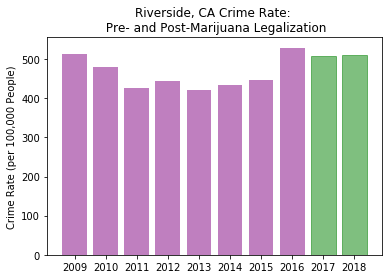

In [21]:
# basic CA graphs from an earlier stage of analysis

file_to_load4 = os.path.join("Output CSVs", "Riverside.csv")

CAcrimeDF = pd.read_csv(file_to_load4)

CAcrimeRates = CAcrimeDF.loc[CAcrimeDF["variable"] == "rate"]

CAcrimeRatesViolent = CAcrimeRates.loc[CAcrimeRates["crime_type"] == "Violent crime"]
CAcrimeRatesViolent = CAcrimeRatesViolent.drop_duplicates()
CAcrimeRatesViolentYears = CAcrimeRatesViolent.loc[CAcrimeRatesViolent["year"].isin(years)]
CAcrimeRatesViolentYears

#CA_prepost_legalization = [2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018]

CAcrimePostLegalization = CAcrimeRatesViolent.loc[CAcrimeRatesViolent["year"].isin(years)]
CAcrimePostLegalization = CAcrimePostLegalization.drop(columns=["key", "id", "place_name"])
CAcrimePostLegalization = CAcrimePostLegalization.sort_values(['year'], ascending=[True])
CAcrimePostLegalization

CA_x_axis = np.arange(len(CAcrimePostLegalization["value"]))
postLegalCA = plt.bar(CA_x_axis, CAcrimePostLegalization["value"], color='purple', alpha=0.5, align="center")
postLegalCA[8].set_color('g')
postLegalCA[9].set_color('g')

tick_locations = [value for value in CA_x_axis]
plt.xticks(tick_locations, years)
plt.title("Riverside, CA Crime Rate: \n Pre- and Post-Marijuana Legalization")
plt.ylabel("Crime Rate (per 100,000 People)")
CAcrimePostLegalization

,name,type,variable,value,year,crime_type
166,"Riverside, California",place,rate,32.680719,2009,Forcible rape
80,"Riverside, California",place,rate,251.774930,2009,Aggravated assault
167,"Riverside, California",place,rate,5.002151,2009,Murder and nonnegligent manslaughter
140,"Riverside, California",place,rate,284.569948,2010,Aggravated assault
58,"Riverside, California",place,rate,25.839879,2010,Forcible rape
260,"Riverside, California",place,rate,2.981524,2010,Murder and nonnegligent manslaughter
187,"Riverside, California",place,rate,4.228426,2011,Murder and nonnegligent manslaughter
179,"Riverside, California",place,rate,254.356092,2011,Aggravated assault
65,"Riverside, California",place,rate,18.540022,2011,Forcible rape
126,"Riverside, California",place,rate,24.239950,2012,Forcible rape


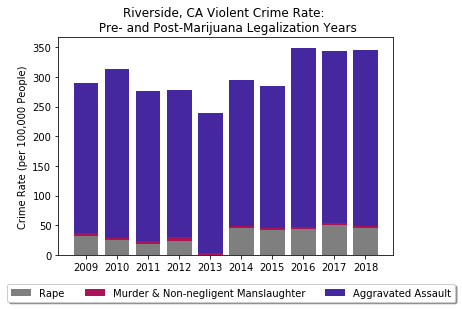

In [45]:
# creating violent crime only set from there:
# restrict this violent crime set to a period of years useful for comparison w/ weed-legal cities:
CAcrimeRatesYears = CAcrimeRates.loc[CAcrimeRates["year"].isin(years)]
CAcrimeRatesYears = CAcrimeRatesYears.drop_duplicates()
# remove extraneous columns
CAcrimeRatesYears = CAcrimeRatesYears.drop(columns=["key", "id", "place_name"])
# sort the years to print in ascending order
CAcrimeRatesYears = CAcrimeRatesYears.sort_values(['year'], ascending=[True])

# create a list with the text of each violent-crime category and filter data again
Vcrime = ["Forcible rape", "Murder and nonnegligent manslaughter", "Aggravated assault", "Rape (revised definition)", 'Rape (legacy definition)']
CAcrimeRatesViolent = CAcrimeRatesYears.loc[CAcrimeRatesYears["crime_type"].isin(Vcrime)]

# Create seperate dataframes for each type of crime:

# create another category for the rape-specific crime types
rapeCategories = ["Forcible rape", "Rape (revised definition)"]
CArape = CAcrimeRatesViolent.loc[CAcrimeRatesViolent["crime_type"].isin(rapeCategories)]
# set the index of each dataframe to the year the data was from
CArape = CArape.set_index(["year"])

CAmurder = CAcrimeRatesViolent.loc[CAcrimeRatesViolent["crime_type"] == "Murder and nonnegligent manslaughter"]
CAmurder = CAmurder.set_index(["year"])

CAassault = CAcrimeRatesViolent.loc[CAcrimeRatesViolent["crime_type"] == "Aggravated assault"]
CAassault = CAassault.set_index(["year"])

# Create a stacked bar plot where each crime type is in a distinct color:

# indices of each dataframe are the same size, can use arbitrary one for plot x-axis
CA_x_axis = CArape.index
# each bar is a line here
p1 = plt.bar(CA_x_axis, CArape["value"], color='black', alpha=0.5, align="center")
# the bottom arguments indicate where to start the second, third, etc bar in the set. From 2 on they become sums:
p2 = plt.bar(CA_x_axis, CAmurder["value"].values, color='#AD1457', bottom=CArape["value"].values)
p3 = plt.bar(CA_x_axis, CAassault["value"].values, color='#4527A0', bottom=(CAmurder["value"] + CArape["value"]).values)

tick_locations = [value for value in CA_x_axis]
plt.xticks(tick_locations, years)
plt.title("Riverside, CA Violent Crime Rate: \n Pre- and Post-Marijuana Legalization Years")
plt.ylabel("Crime Rate (per 100,000 People)")
plt.legend((p1[0], p2[0], p3[0]), ("Rape", "Murder & Non-negligent Manslaughter", "Aggravated Assault"), bbox_to_anchor=(1.2, -0.11),
          fancybox=True, shadow=True, ncol=5)
CAcrimeRatesViolent

,name,type,variable,value,year,crime_type
36,"Riverside, California",place,rate,3198.041825,2009,Property crime
135,"Riverside, California",place,rate,673.622991,2009,Burglary
67,"Riverside, California",place,rate,2080.561308,2009,Larceny
105,"Riverside, California",place,rate,443.857525,2009,Motor vehicle theft
83,"Riverside, California",place,rate,222.428978,2009,Robbery
16,"Riverside, California",place,rate,166.302810,2010,Robbery
156,"Riverside, California",place,rate,2131.458727,2010,Larceny
145,"Riverside, California",place,rate,685.088071,2010,Burglary
60,"Riverside, California",place,rate,3300.547607,2010,Property crime
111,"Riverside, California",place,rate,484.000808,2010,Motor vehicle theft


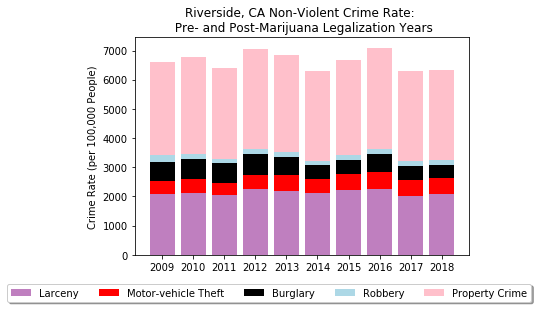

In [47]:
# Non-violent crime categorization for NY starts here:
# create non-violent crimes list
nonVcrime = ["Motor vehicle theft", "Larceny", "Burglary", "Robbery", "Property crime"]

# restricting new DataFrame to non-violent crimes in above list:
CAcrimeRatesNonViolent = CAcrimeRates.loc[CAcrimeRates["crime_type"].isin(nonVcrime)]
CAcrimeRatesNonViolent = CAcrimeRatesNonViolent.drop_duplicates()
CAcrimeRatesNonViolentYears = CAcrimeRatesNonViolent.loc[CAcrimeRatesNonViolent["year"].isin(years)]

# drop extraneous columns
CAcrimeRatesNVComparison = CAcrimeRatesNonViolentYears.drop(columns=["key", "id", "place_name"])
# sort year in ascending order
CAcrimeRatesNVComparison = CAcrimeRatesNVComparison.sort_values(['year'], ascending=[True])

# Create seperate dataframes for each type of crime:
CAlarceny = CAcrimeRatesNVComparison.loc[CAcrimeRatesNVComparison["crime_type"] == "Larceny"]
# set the index of each dataframe to the year
CAlarceny = CAlarceny.set_index(["year"])

CAmotor = CAcrimeRatesNVComparison.loc[CAcrimeRatesNVComparison["crime_type"] == "Motor vehicle theft"]
CAmotor = CAmotor.set_index(["year"])

CAburglary = CAcrimeRatesNVComparison.loc[CAcrimeRatesNVComparison["crime_type"] == "Burglary"]
CAburglary = CAburglary.set_index(["year"])

CArobbery = CAcrimeRatesNVComparison.loc[CAcrimeRatesNVComparison["crime_type"] == "Robbery"]
CArobbery = CArobbery.set_index(["year"])

CApropCrime = CAcrimeRatesNVComparison.loc[CAcrimeRatesNVComparison["crime_type"] == "Property crime"]
CApropCrime = CApropCrime.set_index(["year"])

# Create a stacked bar plot where each crime type is in a distinct color:

# indices of each dataframe are the same size, can use arbitrary one for plot x-axis
CA_x_axis = CAlarceny.index
# each bar is a line here
p1 = plt.bar(CA_x_axis, CAlarceny["value"], color='purple', alpha=0.5, align="center")
p2 = plt.bar(CA_x_axis, CAmotor["value"].values, color='red', bottom=CAlarceny["value"].values)
p3 = plt.bar(CA_x_axis, CAburglary["value"].values, color='black', bottom=(CAmotor["value"] + CAlarceny["value"]).values)
p4 = plt.bar(CA_x_axis, CArobbery["value"].values, color="#ADD8E6", bottom = (CAmotor["value"] + CAlarceny["value"] + CAburglary["value"]).values)
p5 = plt.bar(CA_x_axis, CApropCrime["value"].values, color='pink', bottom = (CAmotor["value"] + CAlarceny["value"] + CAburglary["value"] + CArobbery["value"]).values)

tick_locations = [value for value in CA_x_axis]
plt.xticks(tick_locations, years)
plt.title("Riverside, CA Non-Violent Crime Rate: \n Pre- and Post-Marijuana Legalization Years")
plt.ylabel("Crime Rate (per 100,000 People)")
plt.legend((p1[0], p2[0], p3[0], p4[0], p5[0]), ("Larceny", "Motor-vehicle Theft", "Burglary", "Robbery", "Property Crime"), bbox_to_anchor=(1.2, -0.11),
          fancybox=True, shadow=True, ncol=5)
CAcrimeRatesNVComparison